<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/ML/4_2_%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_k_%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D1%85_(k_means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Алгоритм k-средних (k-means)

## Введение

Алгоритм k-средних (k-means) является одним из самых распространенных методов кластеризации в области машинного обучения и анализа данных. Он используется для разделения данных на $k$ кластеров, где каждый кластер характеризуется своим центроидом. Алгоритм прост в реализации и хорошо работает на больших наборах данных.

## Основные этапы алгоритма k-средних

### Шаг 1: Инициализация центроидов

На этом этапе случайным образом выбираются $k$ начальных центроидов из набора данных. Это может быть выполнено с использованием различных методов, таких как:

- Случайная выборка объектов из данных.
- Выбор объектов, равномерно распределенных по всему пространству данных.

### Шаг 2: Присвоение кластеров

Каждому объекту данных присваивается кластер на основе расстояния до каждого центроида. Обычно используется **евклидово расстояние**, которое для двух точек $A(x_1, y_1)$ и $B(x_2, y_2)$ рассчитывается по формуле:

$$
d(A, B) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$

Объект $x_i$ будет присвоен кластеру $C_j$, если:

$$
C_j = \{ x_i : d(x_i, \mu_j) \leq d(x_i, \mu_l), \forall l \neq j \}
$$

где $\mu_j$ — центроид кластера $j$.

### Шаг 3: Обновление центроидов

После того как все объекты присвоены кластерам, центроиды пересчитываются как среднее значение всех точек, принадлежащих каждому кластеру:

$$
\mu_j = \frac{1}{|C_j|} \sum_{x \in C_j} x
$$

где $|C_j|$ — количество объектов в кластере $C_j$.

### Шаг 4: Проверка на сходимость

Алгоритм продолжается до тех пор, пока центроиды не изменятся больше, чем на заранее установленный порог. Если изменение незначительно, алгоритм завершает работу.

## Математическая модель алгоритма

### Целевая функция

Целью алгоритма k-средних является минимизация **суммы квадратов расстояний** между объектами и их центроидами:

$$
J = \sum_{j=1}^{k} \sum_{x \in C_j} d(x, \mu_j)^2
$$

где:
- $J$ — целевая функция, которую мы хотим минимизировать.
- $k$ — количество кластеров.
- $C_j$ — множество объектов в кластере $j$.
- $\mu_j$ — центроид кластера $j$.

## Оценка качества кластеризации

Для оценки качества кластеризации применяются различные метрики. Ниже приведены наиболее распространенные:

### 1. Силуэтный коэффициент (Silhouette Coefficient)

Силуэтный коэффициент показывает, насколько хорошо каждый объект расположен в своем кластере по сравнению с другими кластерами. Он может принимать значения от -1 до 1. Высокое значение (близкое к 1) указывает на то, что объекты хорошо сгруппированы.

Формула для вычисления силуэтного коэффициента для объекта $i$:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

где:
- $a(i)$ — среднее расстояние от объекта $i$ до всех остальных объектов в том же кластере.
- $b(i)$ — минимальное среднее расстояние от объекта $i$ до объектов других кластеров.

### 2. Коэффициент Дэвиса-Боулдина (Davies-Bouldin Index)

Этот индекс измеряет среднее "сходство" между кластерами. Он рассчитывается как:

$$
DB = \frac{1}{k} \sum_{j=1}^{k} \max_{l \neq j} \frac{s_j + s_l}{d(\mu_j, \mu_l)}
$$

где:
- $s_j$ — средняя расстояние объектов в кластере $j$ до его центроида.
- $d(\mu_j, \mu_l)$ — расстояние между центроидами кластеров $j$ и $l$.

Чем ниже значение коэффициента Дэвиса-Боулдина, тем лучше качество кластеризации.

### 3. Внутрикластерная дисперсия

Внутрикластерная дисперсия представляет собой сумму квадратов расстояний между объектами и центроидами их кластеров. Минимизация этой метрики является целью алгоритма k-средних. Она может быть выражена как:

$$
WSS = \sum_{j=1}^{k} \sum_{x \in C_j} d(x, \mu_j)^2
$$

где $WSS$ (Within-Cluster Sum of Squares) — внутренняя сумма квадратов.

### 4. Кросс-валидация

Кросс-валидация может использоваться для оценки устойчивости кластеров, особенно когда данные меняются. Это позволяет проверить, как алгоритм реагирует на различные подмножества данных.

## Проблемы и ограничения

### Выбор числа кластеров $k$

Выбор оптимального значения $k$ может быть сложной задачей. Для этого часто применяют методы, такие как метод локтя или метод силуэта, которые помогают определить наиболее подходящее число кластеров.

### Чувствительность к инициализации

Алгоритм k-средних чувствителен к выбору начальных центроидов. Плохая инициализация может привести к неэффективным кластерам. Для улучшения процесса инициализации можно использовать метод k-means++.

### Форма кластеров

Алгоритм k-средних предполагает, что кластеры имеют сферическую форму. Если данные имеют сложные формы или перекрываются, алгоритм может не давать хороших результатов.

### Шум и выбросы

Присутствие шумовых данных и выбросов может негативно повлиять на качество кластеризации, так как они могут смещать центроиды.

## Заключение

Алгоритм k-средних является простым и мощным методом для кластеризации. Однако его эффективность зависит от правильной инициализации, выбора числа кластеров и качества данных. Оценка качества кластеризации с использованием различных метрик, таких как силуэтный коэффициент и индекс Дэвиса-Боулдина, позволяет лучше понять, насколько успешно алгоритм сгруппировал данные. Важно помнить о недостатках метода и, при необходимости, использовать дополнительные подходы для улучшения результатов.

## Пример применения алгоритма k-средних (k-means)

### Задача:

Предположим, у нас есть пять точек данных в двумерном пространстве:

- $A(1, 1)$
- $B(1, 4)$
- $C(3, 4)$
- $D(5, 2)$
- $E(5, 5)$

Необходимо разделить эти точки на $k = 2$ кластера с использованием алгоритма k-средних.

### Шаг 1: Инициализация центроидов

На первом шаге алгоритм случайным образом выбирает два начальных центроида из данных. Предположим, что случайным образом выбраны точки $A(1, 1)$ и $E(5, 5)$ в качестве начальных центроидов:

- $\mu_1 = A(1, 1)$
- $\mu_2 = E(5, 5)$

### Шаг 2: Присвоение точек кластерам

Теперь для каждой точки мы вычисляем расстояние до каждого центроида и присваиваем точку тому кластеру, расстояние до центроида которого меньше.

Мы будем использовать **евклидово расстояние** между точками, которое рассчитывается по формуле:

$$
d(A, B) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$

#### Расстояния до $\mu_1 = (1, 1)$ и $\mu_2 = (5, 5)$:

1. **Точка $A(1, 1)$**:
   - $d(A, \mu_1) = \sqrt{(1 - 1)^2 + (1 - 1)^2} = \sqrt{0 + 0} = 0$
   - $d(A, \mu_2) = \sqrt{(5 - 1)^2 + (5 - 1)^2} = \sqrt{16 + 16} = \sqrt{32} \approx 5.66$

   Точка $A$ ближе к $\mu_1$, поэтому она присваивается кластеру 1.

2. **Точка $B(1, 4)$**:
   - $d(B, \mu_1) = \sqrt{(1 - 1)^2 + (4 - 1)^2} = \sqrt{0 + 9} = \sqrt{9} = 3$
   - $d(B, \mu_2) = \sqrt{(5 - 1)^2 + (5 - 4)^2} = \sqrt{16 + 1} = \sqrt{17} \approx 4.12$

   Точка $B$ ближе к $\mu_1$, поэтому она присваивается кластеру 1.

3. **Точка $C(3, 4)$**:
   - $d(C, \mu_1) = \sqrt{(3 - 1)^2 + (4 - 1)^2} = \sqrt{4 + 9} = \sqrt{13} \approx 3.61$
   - $d(C, \mu_2) = \sqrt{(5 - 3)^2 + (5 - 4)^2} = \sqrt{4 + 1} = \sqrt{5} \approx 2.24$

   Точка $C$ ближе к $\mu_2$, поэтому она присваивается кластеру 2.

4. **Точка $D(5, 2)$**:
   - $d(D, \mu_1) = \sqrt{(5 - 1)^2 + (2 - 1)^2} = \sqrt{16 + 1} = \sqrt{17} \approx 4.12$
   - $d(D, \mu_2) = \sqrt{(5 - 5)^2 + (2 - 5)^2} = \sqrt{0 + 9} = \sqrt{9} = 3$

   Точка $D$ ближе к $\mu_2$, поэтому она присваивается кластеру 2.

5. **Точка $E(5, 5)$**:
   - $d(E, \mu_1) = \sqrt{(5 - 1)^2 + (5 - 1)^2} = \sqrt{16 + 16} = \sqrt{32} \approx 5.66$
   - $d(E, \mu_2) = \sqrt{(5 - 5)^2 + (5 - 5)^2} = \sqrt{0 + 0} = 0$

   Точка $E$ ближе к $\mu_2$, поэтому она присваивается кластеру 2.

### Шаг 3: Обновление центроидов

Теперь пересчитаем центроиды для каждого кластера как среднее значение всех точек, принадлежащих к этому кластеру.

#### Кластер 1: $A(1, 1), B(1, 4)$

Новый центроид $\mu_1$ вычисляется как среднее значение координат точек $A$ и $B$:

$$
\mu_1 = \left( \frac{1 + 1}{2}, \frac{1 + 4}{2} \right) = (1, 2.5)
$$

#### Кластер 2: $C(3, 4), D(5, 2), E(5, 5)$

Новый центроид $\mu_2$ вычисляется как среднее значение координат точек $C$, $D$ и $E$:

$$
\mu_2 = \left( \frac{3 + 5 + 5}{3}, \frac{4 + 2 + 5}{3} \right) = \left( \frac{13}{3}, \frac{11}{3} \right) \approx (4.33, 3.67)
$$

### Шаг 4: Присвоение точек кластерам (повтор)

Теперь снова повторяем шаг 2 с новыми центроидами $\mu_1 = (1, 2.5)$ и $\mu_2 = (4.33, 3.67)$.

#### Расстояния до $\mu_1 = (1, 2.5)$ и $\mu_2 = (4.33, 3.67)$:

1. **Точка $A(1, 1)$**:
   - $d(A, \mu_1) = \sqrt{(1 - 1)^2 + (1 - 2.5)^2} = \sqrt{0 + 2.25} = \sqrt{2.25} = 1.5$
   - $d(A, \mu_2) = \sqrt{(4.33 - 1)^2 + (3.67 - 1)^2} \approx \sqrt{11.1} \approx 3.33$

   Точка $A$ ближе к $\mu_1$, поэтому она присваивается кластеру 1.

2. **Точка $B(1, 4)$**:
   - $d(B, \mu_1) = \sqrt{(1 - 1)^2 + (4 - 2.5)^2} = \sqrt{0 + 2.25} = \sqrt{2.25} = 1.5$
   - $d(B, \mu_2) = \sqrt{(4.33 - 1)^2 + (3.67 - 4)^2} \approx \sqrt{11.2} \approx 3.35$

   Точка $B$ ближе к $\mu_1$, поэтому она присваивается кластеру 1.

3. **Точка $C(3, 4)$**:
   - $d(C, \mu_1) = \sqrt{(3 - 1)^2 + (4 - 2.5)^2} = \sqrt{4 + 2.25} = \sqrt{6.25} = 2.5$
   - $d(C, \mu_2) = \sqrt{(4.33 - 3)^2 + (3.67 - 4)^2} \approx \sqrt{1.78} \approx 1.33$

   Точка $C$ ближе к $\mu_2$, поэтому она присваивается кластеру 2.

4. **Точка $D(5, 2)$**:
   - $d(D, \mu_1) = \sqrt{(5 - 1)^2 + (2 - 2.5)^2} = \sqrt{16 + 0.25} = \sqrt{16.25} \approx 4.03$
   - $d(D, \mu_2) = \sqrt{(4.33 - 5)^2 + (3.67 - 2)^2} \approx \sqrt{1.47} \approx 1.21$

   Точка $D$ ближе к $\mu_2$, поэтому она присваивается кластеру 2.

5. **Точка $E(5, 5)$**:
   - $d(E, \mu_1) = \sqrt{(5 - 1)^2 + (5 - 2.5)^2} = \sqrt{16 + 6.25} = \sqrt{22.25} \approx 4.72$
   - $d(E, \mu_2) = \sqrt{(4.33 - 5)^2 + (3.67 - 5)^2} \approx \sqrt{2.39} \approx 1.55$

   Точка $E$ ближе к $\mu_2$, поэтому она присваивается кластеру 2.

### Шаг 5: Обновление центроидов (второй раз)

Теперь пересчитаем центроиды снова:

#### Кластер 1: $A(1, 1), B(1, 4)$

$$
\mu_1 = \left( \frac{1 + 1}{2}, \frac{1 + 4}{2} \right) = (1, 2.5)
$$

#### Кластер 2: $C(3, 4), D(5, 2), E(5, 5)$

$$
\mu_2 = \left( \frac{3 + 5 + 5}{3}, \frac{4 + 2 + 5}{3} \right) = \left( \frac{13}{3}, \frac{11}{3} \right) \approx (4.33, 3.67)
$$

### Шаг 6: Проверка на сходимость

Центроиды не изменились, поэтому алгоритм завершает свою работу.

### Итоговое распределение кластеров

- Кластер 1: $A(1, 1), B(1, 4)$
- Кластер 2: $C(3, 4), D(5, 2), E(5, 5)$

### Вывод

В результате применения алгоритма k-средних мы получили два кластера:

- **Кластер 1**: точки $A(1, 1)$ и $B(1, 4)$
- **Кластер 2**: точки $C(3, 4)$, $D(5, 2)$ и $E(5, 5)$

Этот процесс демонстрирует, как k-средние эффективно группируют данные на основе расстояний до центроидов.


### Реализация алгоритма k-средних (k-means) на Python
В этом примере мы реализуем алгоритм k-средних в Python сначала без использования готовых библиотек и классов, а затем с использованием библиотеки scikit-learn и визуализацией с помощью matplotlib.

### Часть 1: Реализация без готовых библиотек

Инерция: 11.833333333333334
Коэффициент силуэта: 0.27224560489144484


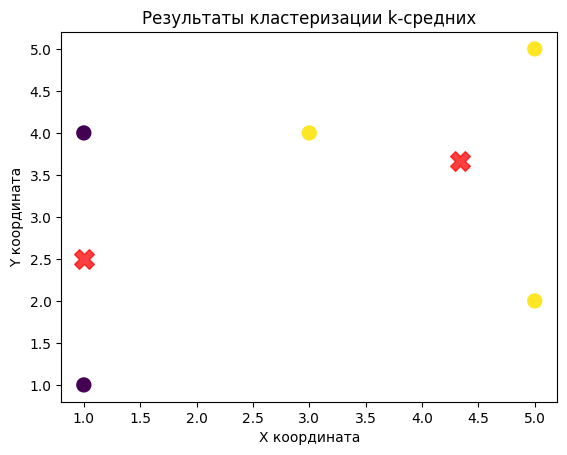

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Данные
points = np.array([[1, 1], [1, 4], [3, 4], [5, 2], [5, 5]])

# Количество кластеров
k = 2

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def assign_clusters(points, centroids):
    clusters = []
    for point in points:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)  # Находим индекс ближайшего центроида
        clusters.append(cluster)
    return np.array(clusters)

def update_centroids(points, clusters, k):
    centroids = []
    for i in range(k):
        cluster_points = points[clusters == i]
        if len(cluster_points) > 0:
            centroids.append(cluster_points.mean(axis=0))
        else:
            centroids.append(points[np.random.choice(range(len(points)))])  # Случайный выбор
    return np.array(centroids)

def calculate_inertia(points, clusters, centroids):
    inertia = 0
    for i in range(len(points)):
        inertia += euclidean_distance(points[i], centroids[clusters[i]]) ** 2
    return inertia

def silhouette_score(points, clusters):
    silhouette_values = []
    for i in range(len(points)):
        own_cluster = clusters[i]
        a_i = np.mean([euclidean_distance(points[i], points[j]) for j in range(len(points)) if clusters[j] == own_cluster and j != i])
        b_i = np.min([np.mean([euclidean_distance(points[i], points[j]) for j in range(len(points)) if clusters[j] == other_cluster])
                       for other_cluster in np.unique(clusters) if other_cluster != own_cluster])
        s_i = (b_i - a_i) / max(a_i, b_i)
        silhouette_values.append(s_i)
    return np.mean(silhouette_values)

# Инициализация центроидов
centroids = np.array([points[0], points[4]])  # Первые и последние точки как начальные центроиды

for _ in range(10):  # Количество итераций
    clusters = assign_clusters(points, centroids)  # Присваиваем кластеры
    centroids = update_centroids(points, clusters, k)  # Обновляем центроиды

# Вычисление инерции
inertia = calculate_inertia(points, clusters, centroids)
print(f"Инерция: {inertia}")

# Вычисление коэффициента силуэта
silhouette_avg = silhouette_score(points, clusters)
print(f"Коэффициент силуэта: {silhouette_avg}")

# Визуализация
plt.scatter(points[:, 0], points[:, 1], c=clusters, s=100, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('Результаты кластеризации k-средних')
plt.xlabel('X координата')
plt.ylabel('Y координата')
plt.show()

### Часть 2: Реализация с использованием готовых библиотек
Теперь давайте реализуем тот же алгоритм с помощью библиотеки scikit-learn.

Инерция: 20.0
Коэффициент силуэта: 0.03070060591131345


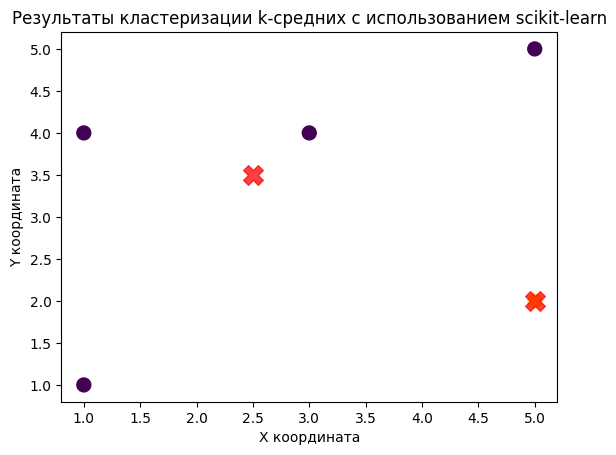

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Данные
points = np.array([[1, 1], [1, 4], [3, 4], [5, 2], [5, 5]])

# Создаем и обучаем модель k-средних
kmeans = KMeans(n_clusters=2, random_state=0).fit(points)

# Получаем метки кластеров и центроиды
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

# Вычисление инерции
inertia = kmeans.inertia_
print(f"Инерция: {inertia}")

# Вычисление коэффициента силуэта
silhouette_avg = silhouette_score(points, clusters)
print(f"Коэффициент силуэта: {silhouette_avg}")

# Визуализация
plt.scatter(points[:, 0], points[:, 1], c=clusters, s=100, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('Результаты кластеризации k-средних с использованием scikit-learn')
plt.xlabel('X координата')
plt.ylabel('Y координата')
plt.show()


### Вопросы для самопроверки

1. Что такое алгоритм k-средних и для чего он используется?
2. Какие шаги включает в себя алгоритм k-средних?
3. Как происходит инициализация центроидов в алгоритме k-средних?
4. Какое расстояние обычно используется для присвоения объектов кластерам?
5. Как вычисляется новое значение центроида после присвоения объектов кластерам?
6. Как определяется сходимость алгоритма k-средних?
7. Что такое целевая функция в контексте алгоритма k-средних?
8. Как рассчитывается силуэтный коэффициент и что он показывает?
9. Что такое индекс Дэвиса-Боулдина и как он используется для оценки кластеризации?
10. Какие проблемы могут возникнуть при использовании алгоритма k-средних?
11. Как можно определить оптимальное количество кластеров $k$?
12. Что такое внутренний квадрат суммы (WSS) и как он связан с качеством кластеризации?
13. В чем заключается чувствительность алгоритма k-средних к инициализации центроидов?
14. Как алгоритм k-средних справляется с шумом и выбросами в данных?
15. Какие альтернативные методы могут использоваться для улучшения кластеризации, если k-средних не дает хороших результатов?

### Задачи для самостоятельной работы

1. Реализуйте алгоритм k-средних на языке Python. Напишите код, который будет работать на искусственно созданном наборе данных.
2. Проведите кластеризацию на наборе данных Iris с использованием алгоритма k-средних. Определите оптимальное значение $k$ с помощью метода локтя.
3. Используйте метод силуэта для оценки качества кластеризации на наборе данных из предыдущей задачи.
4. Модифицируйте алгоритм k-средних, чтобы включить метод k-means++. Сравните результаты с обычным k-средних.
5. Проанализируйте, как изменится качество кластеризации, если выбросы добавлены к набору данных.
6. Исследуйте влияние выбора начальных центроидов на результаты кластеризации. Проведите несколько запусков алгоритма и сравните результаты.
7. Постройте график, показывающий изменение значений центроидов в процессе итераций.
8. Разработайте алгоритм для автоматического выбора $k$ с использованием кросс-валидации.
9. Примените алгоритм k-средних к реальным данным, например, к набору данных о клиентах магазина. Сравните результаты с другими методами кластеризации.
10. Исследуйте, как изменение расстояния (например, использование манхэттенского расстояния вместо евклидова) влияет на результаты кластеризации.
11. Напишите отчет о том, как алгоритм k-средних применяется в различных областях (например, в маркетинге, биологии, социальной сети).
12. Проведите анализ ошибок в алгоритме k-средних, используя различные метрики для оценки качества кластеризации.
13. Реализуйте алгоритм k-средних на графической платформе, чтобы визуализировать процесс кластеризации.
14. Изучите влияние размера и распределения данных на производительность алгоритма k-средних.
15. Оптимизируйте реализацию алгоритма k-средних для работы с большими наборами данных (например, используя параллельные вычисления).
16. Проведите сравнение алгоритма k-средних с другими методами кластеризации, такими как иерархическая кластеризация и DBSCAN.
17. Попробуйте улучшить результаты кластеризации с помощью предварительной обработки данных (например, нормализации или стандартизации).
18. Реализуйте и сравните алгоритмы k-средних с различными значениями $k$ на 2D и 3D наборах данных.
19. Исследуйте алгоритм k-средних для временных рядов. Как его можно адаптировать для этой задачи?
20. Рассмотрите методы, позволяющие избежать проблем с локальными минимумами в k-средних.
21. Изучите, как алгоритм k-средних может быть использован для сегментации изображений.
22. Проведите анализ стабильности кластеров при изменении входных данных с использованием кросс-валидации.
23. Сравните кластеры, полученные с использованием k-средних и других методов (например, k-медоидов).
24. Реализуйте метрики для оценки качества кластеризации и протестируйте их на разных наборах данных.
25. Используйте k-средних для создания рекомендаций на основе кластеризации пользователей или продуктов.
26. Изучите, как можно использовать алгоритм k-средних для аномального детектирования.
27. Реализуйте алгоритм k-средних с использованием различных языков программирования (например, R, Java, Julia).
28. Примените алгоритм k-средних для анализа текстов (например, для кластеризации статей по тематике).
29. Проанализируйте результаты кластеризации, используя различные визуализации, такие как тепловые карты и диаграммы рассеяния.
30. Опишите сценарий, в котором алгоритм k-средних мог бы быть неэффективен, и предложите альтернативные подходы.

